In [1]:
%load_ext autoreload
%autoreload 2
%load_ext google.cloud.bigquery

In [2]:
from __future__ import print_function, absolute_import, division

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from wgomoku import (
    GomokuBoard, Heuristics, GomokuTools as gt, HeuristicGomokuPolicy, ThreatSearch)

from google.cloud import bigquery
#import google.datalab.bigquery as bq

In [4]:
A,B,C,D,E,F,G,H,I, J, K, L, M, N, O, P, Q, R, S, T, U = \
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK, WHITE, EDGES = 0,1,2

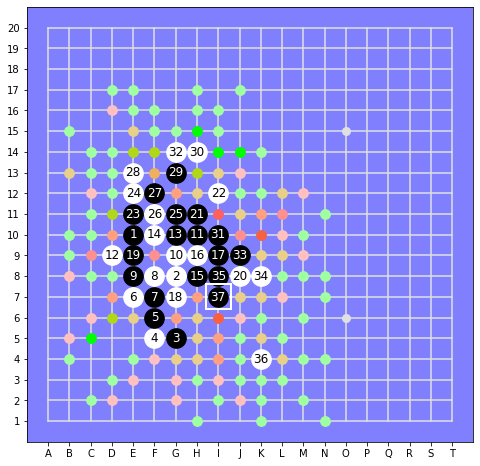

In [5]:
stones = gt.string_to_stones('e10g8g5f5f6e7f7f8e8g9h10d9g10f10h8h9i9g7e9j8h11i12e11e12g11f11f12e13g13h14i10g14j9k8i8k4i7')

b = GomokuBoard(heuristics=Heuristics(kappa=3), N=20, stones=stones, disp_width=8)
b.display('current')

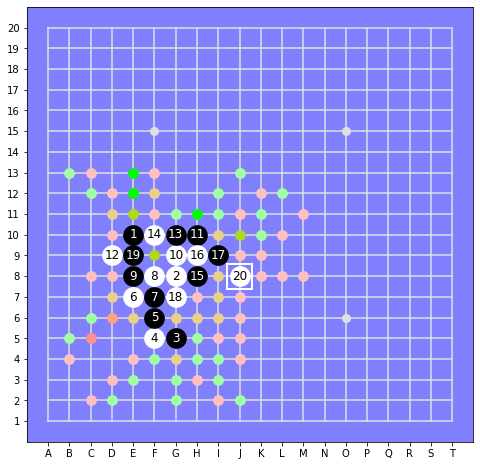

In [10]:
from copy import deepcopy
board = deepcopy(b)
(board.undo().undo().undo().undo().undo().undo().undo().undo().undo()
.undo().undo().undo().undo().undo().undo().undo().undo()
)
board.display('current')

In [11]:
moves, won = ThreatSearch(11,10).is_tseq_won(board)
moves, won

([(8, 11),
  (6, 9),
  (7, 11),
  (5, 11),
  (6, 12),
  (5, 13),
  (9, 11),
  (10, 11),
  (9, 10),
  (9, 8),
  (10, 10),
  (11, 10),
  (9, 12),
  (9, 13),
  (8, 12),
  (7, 13),
  (7, 12)],
 True)

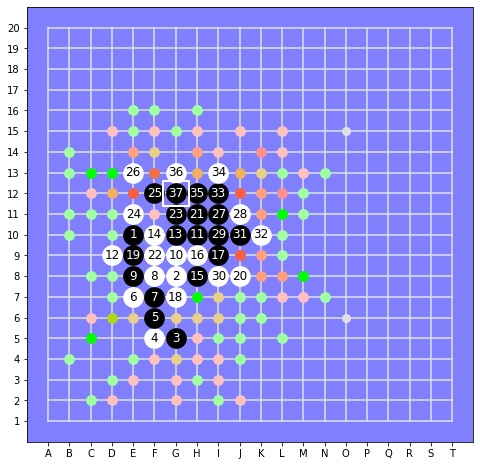

In [12]:
threat_sequence = deepcopy(board)
for x,y in moves:
    threat_sequence.set(x,y)
threat_sequence.display('current')

In [ ]:
HeuristicGomokuPolicy(bias=.5, topn=5, style=1).suggest(board=threat_sequence)

## Threats from different perspectives

In [ ]:
stones = gt.string_to_stones('f6g7i7f8g8h8j10g10h9i9i10f10g11h11i11j11i12i13d10f7')

b = GomokuBoard(heuristics=Heuristics(kappa=3), N=20, stones=stones, disp_width=8)
b.display('current')

In [ ]:
ts = ThreatSearch(3,3)
moves, won = ts.is_tseq_won(b)
moves, won

### A threat against me

In [ ]:
b.set(I, 14).display('current')
moves = ts.is_tseq_threat(b,3)
moves